<a href="https://colab.research.google.com/github/mohammadRahimi1993/BigData/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. DataSet Understand**

# 1.1 import Libraries


In [40]:
# Load Libraries:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.offline as pyo 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected = True)
from matplotlib.colors import ListedColormap
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import stats
from scipy.stats import norm
from scipy.stats import probplot
import scipy as stat
from scipy.stats import skew
from scipy import stats
from sklearn.preprocessing import PowerTransformer
#
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
#
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA


# 1.2 import Dataset

In [41]:
df = pd.read_csv("/content/drive/MyDrive/DataSet/iris.csv")
df = pd.DataFrame(df)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


# 1.3 Descriptive Analysis

In [42]:
describe = df.describe().T
print(describe)

                   count      mean       std  min  25%   50%  75%  max
sepal length (cm)  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width (cm)   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
petal length (cm)  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
petal width (cm)   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5
target             150.0  1.000000  0.819232  0.0  0.0  1.00  2.0  2.0


# 1.4 Checking Skewness Basically

In [43]:
def check_skewness(dataframe):

    global describe
    
    for i in range(describe.shape[1]):
        mean = round(describe.iloc[1,i],3)
        median = round(describe.iloc[4,i],3)
    
        if mean > median:
            print("Positive Skewness\t:\t{}\t".format(describe.columns[i]))
        elif mean == median:
            print("No Skew          \t:\t{}\t".format(describe.columns[i]))
        else:
            print("Negative Skewness\t:\t{}\t".format(describe.columns[i]))
            
check_skewness(df)

No Skew          	:	count	
Positive Skewness	:	mean	
Negative Skewness	:	std	
Positive Skewness	:	min	
Positive Skewness	:	25%	
Positive Skewness	:	50%	
Positive Skewness	:	75%	
Positive Skewness	:	max	


# 1.5 Missing Values

In [44]:
#df.info()
def Missing_Values_Table(df):
    missing_value = df.isnull().sum()
    missing_value_percent = 100*df.isnull().sum()/len(df)
    missing_value_table = pd.concat([missing_value,missing_value_percent],axis = 1)
    missing_value_table__ = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Percent'})
    return missing_value_table__

Missing_Values_Table(df)

,Missing Values,% Percent
sepal length (cm),0,0.0
sepal width (cm),0,0.0
petal length (cm),0,0.0
petal width (cm),0,0.0
target,0,0.0


In [45]:
df = df.rename(columns = {"target":"Target"})
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# 1.6 Correlation Matrix

Text(0.5, 1.0, 'Correlation Features')

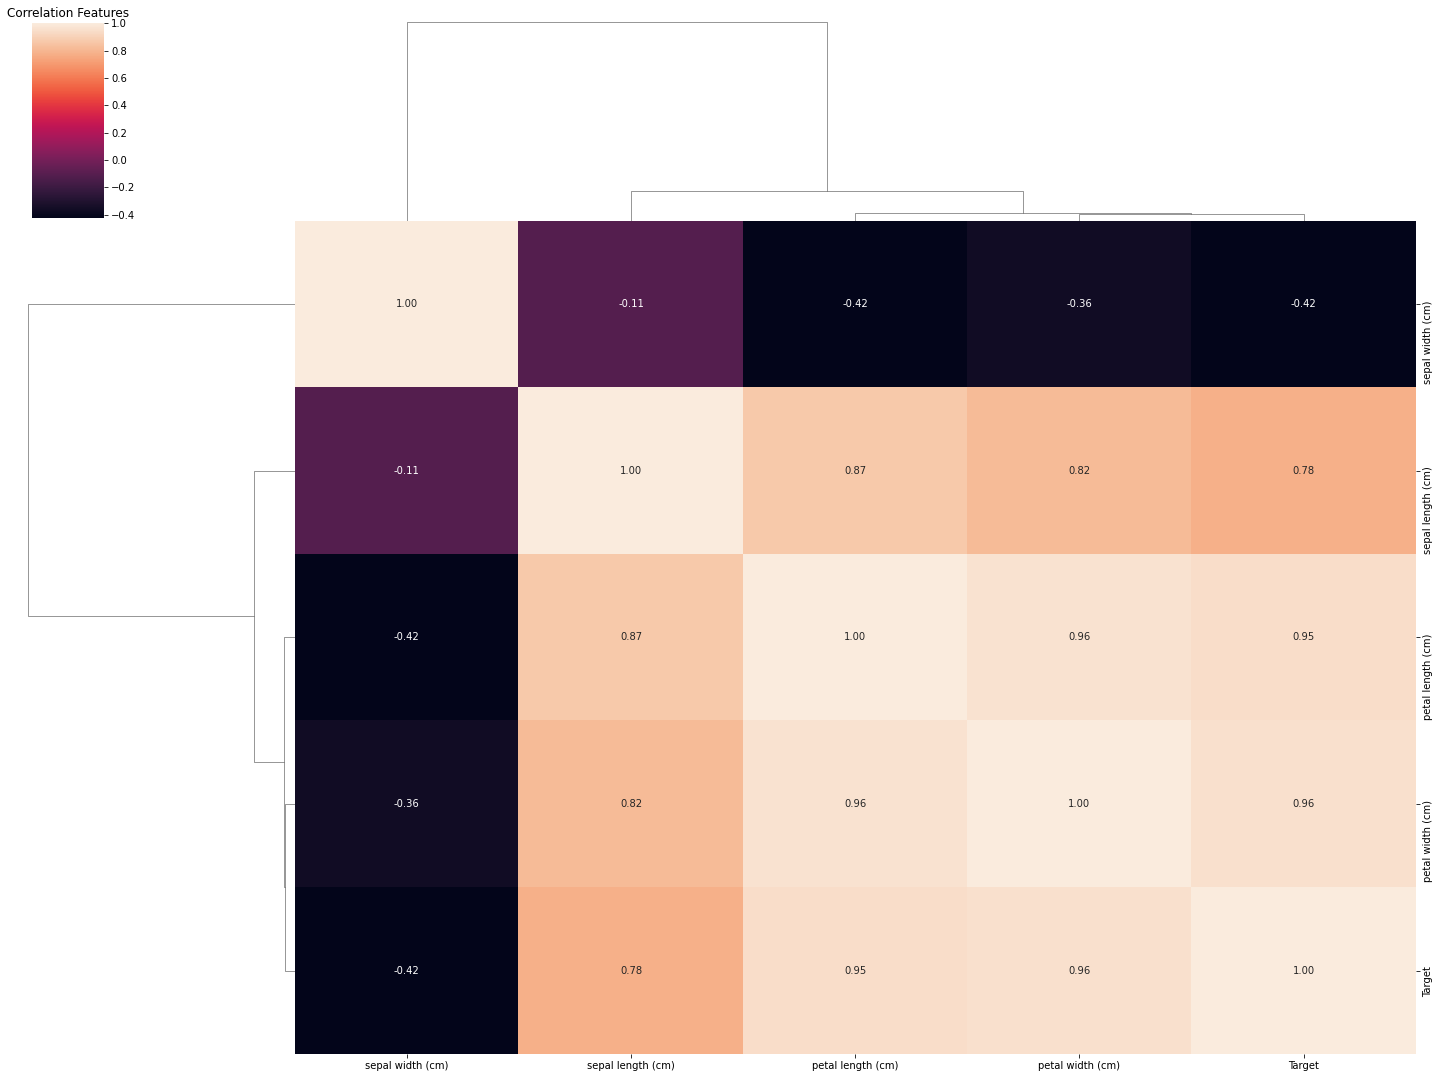

In [46]:
# correlation:
corr_matrix = df.corr()
sns.clustermap(corr_matrix,annot=True,fmt=".2f",figsize=(20,15))
plt.title("Correlation Features")

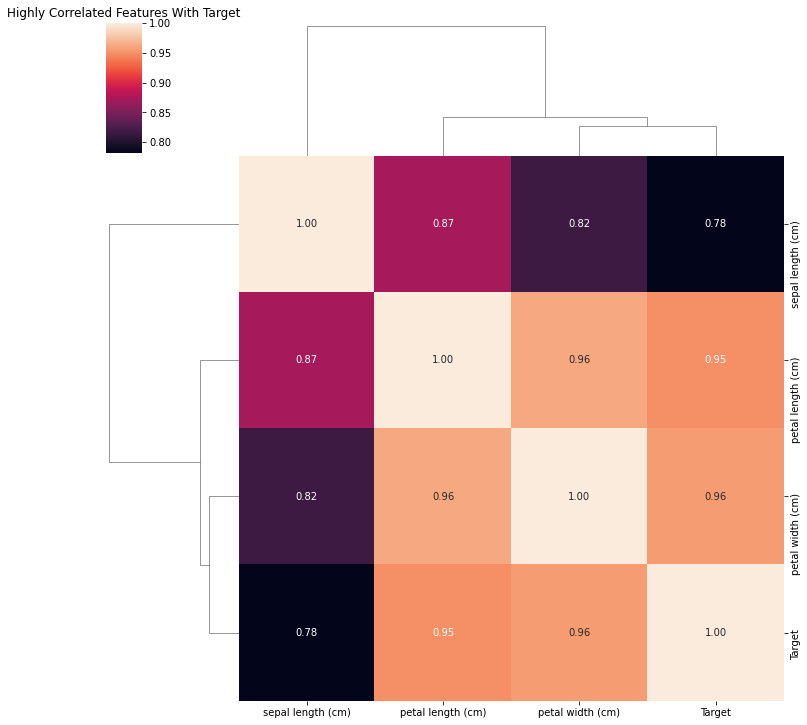

In [47]:
thrs = 0.7
filt = np.abs(corr_matrix["Target"])>=thrs
correlation_features = corr_matrix.columns[filt].tolist()
sns.clustermap(df[correlation_features].corr(),annot = True, fmt = ".2f")
plt.title("Highly Correlated Features With Target")
plt.show()

# 1.7 Pair Plot

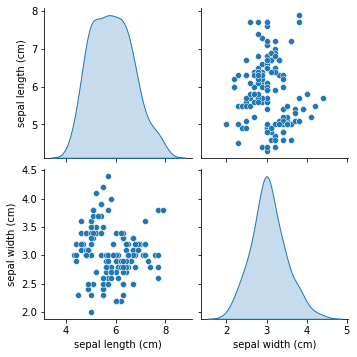

In [48]:
# pair plot
thrs = 0.9
filt1 = np.abs(corr_matrix["Target"])<=thrs
correlation_features = corr_matrix.columns[filt1].tolist()
sns.pairplot(df[correlation_features], diag_kind="kde")
plt.show()

# 1.8 Box Plot (we can see outliers)

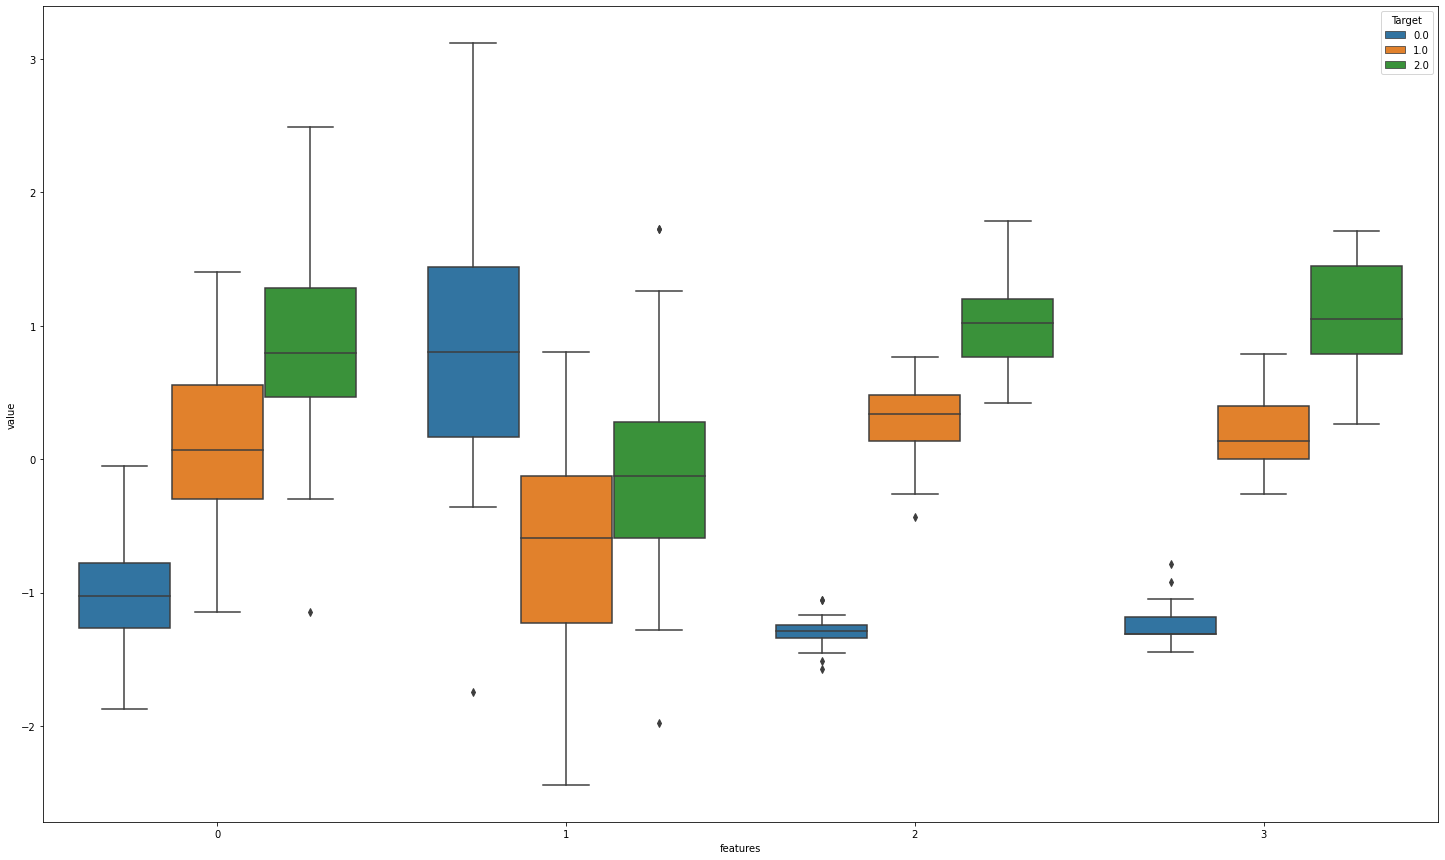

In [49]:
# We only used StandardScaler for visualization.

Y_visualization = df["Target"]
X_visualization = df.drop("Target",axis = 1)

scaler_visualization = StandardScaler()
X_visualization = scaler_visualization.fit_transform(X_visualization)

df_visualization = pd.DataFrame(X_visualization)
df_visualization["Target"] = Y_visualization


df_melted = pd.melt(df_visualization,id_vars="Target",var_name="features",value_name="value")
plt.figure(figsize=(25,15))
sns.boxplot(x="features",y="value",hue="Target",data=df_melted)
plt.show()

# 1.9 Count Plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



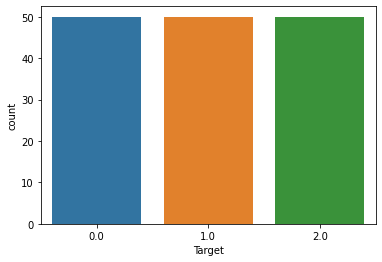

In [50]:
sns.countplot(df["Target"])
plt.show()

# **2- Data Preparation**

# 2-1 Fill Missing Values With Mode

In [51]:
# don't exist any missing value

# 2-2 Outlier Detection (LOF)

In [52]:
y = df["Target"]
X = df.drop(["Target"],axis=1)
columns = X.columns.tolist()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



We have 12 Outlier and 138 Inlier Values


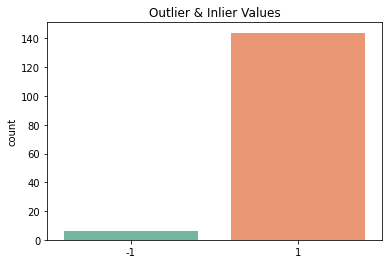

In [53]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(X)
outlier = len(y_pred)-(y_pred.sum())
inlier = len(y_pred)-outlier

print("We have {} Outlier and {} Inlier Values".format(outlier,inlier))
sns.countplot(y_pred,palette="Set2")
plt.title("Outlier & Inlier Values")
plt.show()

In [54]:
X_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

In [55]:
np.abs(outlier_score["score"]).sort_values(ascending=False).head(10)

41     1.777101
15     1.654652
118    1.621738
117    1.570164
131    1.544506
98     1.511868
122    1.488682
14     1.463596
57     1.432891
93     1.401342
Name: score, dtype: float64

In [56]:
thresh = -2.5
filt = outlier_score["score"] < thresh
outlier_index = outlier_score[filt].index.tolist()

# Radius for our outliers
Normal_Nucleoli = (X_score.max()-X_score)/(X_score.max()-X_score.min())
outlier_score["Normal_Nucleoli"] = Normal_Nucleoli

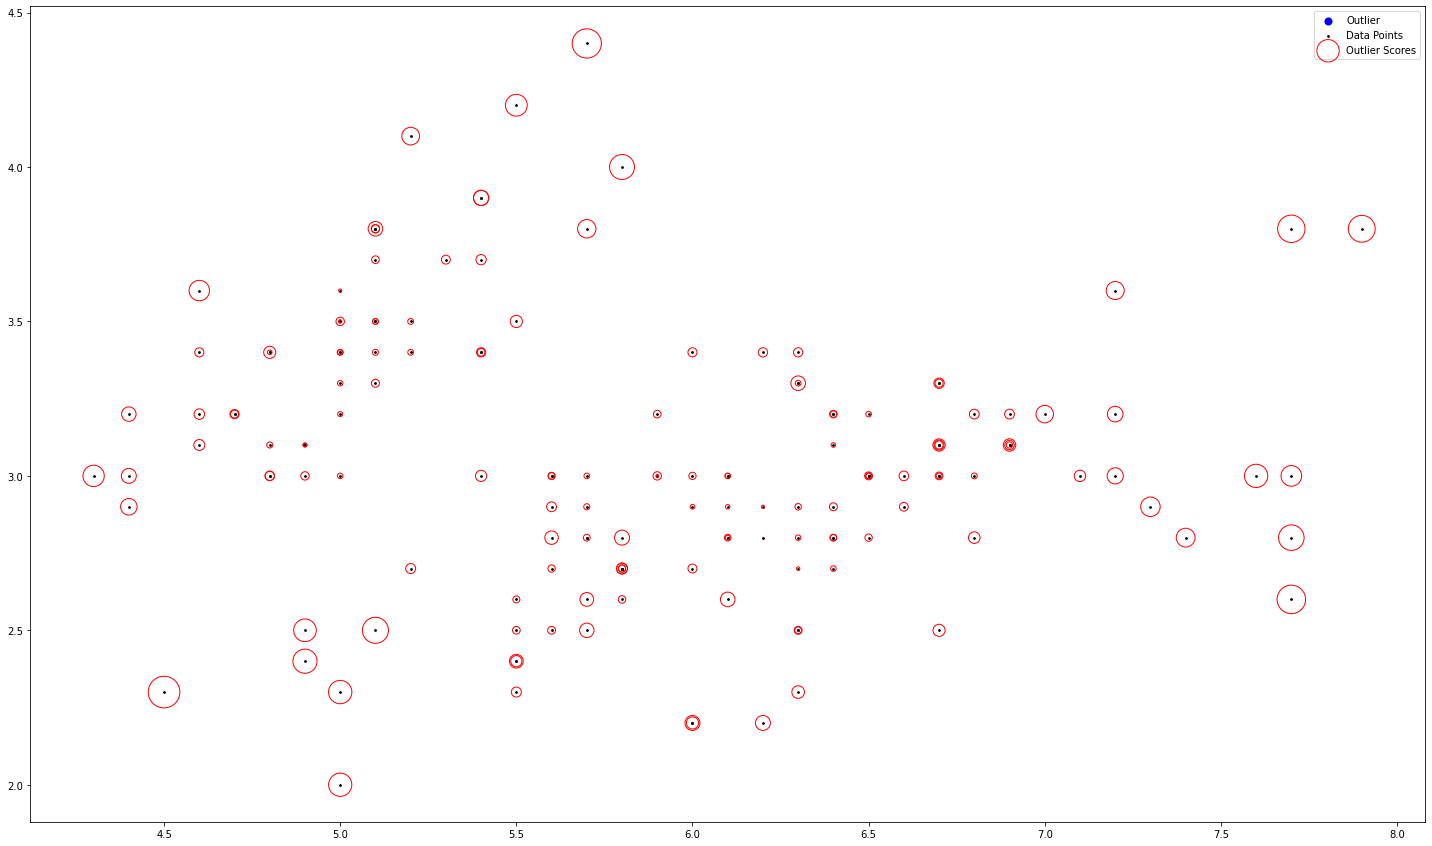

In [57]:
plt.figure(figsize=(25,15))
plt.scatter(X.iloc[outlier_index,0],X.iloc[outlier_index,1],color = "blue",s=50, label = "Outlier")
plt.scatter(X.iloc[:,0],X.iloc[:,1],color = "k",s=3, label = "Data Points")
plt.scatter(X.iloc[:,0],X.iloc[:,1],color = "k",s=1000*Normal_Nucleoli,edgecolors="r",facecolors="none", label = "Outlier Scores")
plt.legend()
plt.show()

# 2.3 Skewness & Data Transformation & PowerTransformer

In [58]:
y = df["Target"]
X = df.drop(["Target"],axis=1)
columns = X.columns.tolist()
X.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [59]:
skewed = X.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame(skewed, columns=["skewness"])
print("Before:",skewness)

pt = PowerTransformer(standardize=False, copy=False)
pt.fit_transform(X["sepal width (cm)"].values.reshape(-1, 1))

skewed = X.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame(skewed, columns=["skewness"])
print("After:",skewness)

Before:                    skewness
sepal width (cm)   0.330703
sepal length (cm)  0.311753
petal width (cm)  -0.103944
petal length (cm) -0.271712
After:                    skewness
sepal length (cm)  0.311753
sepal width (cm)   0.000039
petal width (cm)  -0.103944
petal length (cm) -0.271712


# 2.4 Create Train and Test Dataset

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 2.5 Standardization

In [61]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test) 

# **3. Modeling and Evalution**

# 3.1 K Nearest Neighbors model

In [62]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(x_train,y_train)

KNN_predictions_train = KNN_model.predict(x_train)
KNN_predictions_test = KNN_model.predict(x_test)

acc_test = accuracy_score(y_test, KNN_predictions_test)
acc_train = accuracy_score(y_train, KNN_predictions_train)

C_M = confusion_matrix(y_test,KNN_predictions_test)
TN = C_M[0,0]
TP = C_M[1,1]
FN = C_M[1,0]
FP = C_M[0,1]

model_evaluate=pd.DataFrame({
    'Accuracy':(TN+TP)/(TP+TN+FP+FN),
    'Precision':TP/(TP+FP),
    'Sensitivity':TP/(TP+FN),
    'Specificity':TN/(TN+FP)
   },
  index=["KNN"])
model_evaluate

,Accuracy,Precision,Sensitivity,Specificity
KNN,1.0,1.0,1.0,1.0


# 3.1 K Nearest Neighbors model & Fine-tune Hyper-Parameter

In [63]:
def KNN_Best_params(x_train,x_test,y_train,y_test,model_evaluate):

    k_range = list(range(1,31))
    weight_potions = ["uniform","distance"]
    print()
    param_grid = {'n_neighbors': k_range, 'weights': weight_potions}

    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")
    grid.fit(x_train, y_train)

    print("Optimization parameters: {} ".format(grid.best_params_))
    print()

    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train,y_train)

    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)

    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)

    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
  
    TN = cm_test[0,0]
    TP = cm_test[1,1]
    FN = cm_test[1,0]
    FP = cm_test[0,1]

    model_evaluate=model_evaluate.append(pd.DataFrame({
       'Accuracy':(TN+TP)/(TP+TN+FP+FN),
       'Precision':TP/(TP+FP),
       'Sensitivity':TP/(TP+FN),
       'Specificity':TN/(TN+FP)
        },
      index=["KNN+PCA+Tune"]))

    return grid, model_evaluate
grid_knn_pca, model_evaluate = KNN_Best_params(x_train,x_test,y_train,y_test,model_evaluate)
model_evaluate


Optimization parameters: {'n_neighbors': 3, 'weights': 'distance'} 



,Accuracy,Precision,Sensitivity,Specificity
KNN,1.0,1.0,1.0,1.0
KNN+PCA+Tune,1.0,1.0,1.0,1.0


# 3.2 Support Vector Classifier model

In [64]:
from sklearn.svm import SVC
SV_model = SVC()
SV_model.fit(x_train,y_train)
predictions = SV_model.predict(x_test)
cm_test = confusion_matrix(y_test,predictions)
TN = cm_test[0,0]
TP = cm_test[1,1]
FN = cm_test[1,0]
FP = cm_test[0,1]

model_evaluate=model_evaluate.append(pd.DataFrame({
       'Accuracy':(TN+TP)/(TP+TN+FP+FN),
       'Precision':TP/(TP+FP),
       'Sensitivity':TP/(TP+FN),
       'Specificity':TN/(TN+FP)
        },
index=["SVM"]))
model_evaluate

,Accuracy,Precision,Sensitivity,Specificity
KNN,1.0,1.0,1.0,1.0
KNN+PCA+Tune,1.0,1.0,1.0,1.0
SVM,1.0,1.0,1.0,1.0


# 3.2 Support Vector Classifier model & Fine-tun Hyperparameter

In [65]:
from sklearn.svm import SVC
svc_params = {"C": np.arange(1,10)}
svc = SVC(kernel = "linear")
svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )
svc_cv_model.fit(x_train, y_train)

predictions = svc_cv_model.predict(x_test)
cm_test=confusion_matrix(y_test,predictions)
TN = cm_test[0,0]
TP = cm_test[1,1]
FN = cm_test[1,0]
FP = cm_test[0,1]

model_evaluate=model_evaluate.append(pd.DataFrame({
       'Accuracy':(TN+TP)/(TP+TN+FP+FN),
       'Precision':TP/(TP+FP),
       'Sensitivity':TP/(TP+FN),
       'Specificity':TN/(TN+FP)
        },
index=["SVM+Tune"]))
model_evaluate

Fitting 10 folds for each of 9 candidates, totalling 90 fits


,Accuracy,Precision,Sensitivity,Specificity
KNN,1.0,1.0,1.0,1.0
KNN+PCA+Tune,1.0,1.0,1.0,1.0
SVM,1.0,1.0,1.0,1.0
SVM+Tune,1.0,1.0,1.0,1.0


# 3.3 LOGISTIC REGRESSION

In [66]:
# logistic regression

from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=42,max_iter=10000)
logr.fit(x_train,y_train)

y_pred_logr_test = logr.predict(x_test)

cm_test = confusion_matrix(y_test,y_pred_logr_test)
logr_acc = metrics.accuracy_score(y_test, y_pred_logr_test)

TN = cm_test[0,0]
TP = cm_test[1,1]
FN = cm_test[1,0]
FP = cm_test[0,1]

model_evaluate=model_evaluate.append(pd.DataFrame({
       'Accuracy':(TN+TP)/(TP+TN+FP+FN),
       'Precision':TP/(TP+FP),
       'Sensitivity':TP/(TP+FN),
       'Specificity':TN/(TN+FP)
        },
index=["LR"]))
model_evaluate

,Accuracy,Precision,Sensitivity,Specificity
KNN,1.0,1.0,1.0,1.0
KNN+PCA+Tune,1.0,1.0,1.0,1.0
SVM,1.0,1.0,1.0,1.0
SVM+Tune,1.0,1.0,1.0,1.0
LR,1.0,1.0,1.0,1.0


# 3.3 LOGISTIC REGRESSION & Fine-tune hyperparameter

In [67]:
from sklearn.linear_model import LogisticRegression
def Logistic_Regression_Best_params(x_train,x_test,y_train,y_test,model_evaluate):

    C = np.logspace(-4, 4, 50)
    penalty = ['l1', 'l2']
    max_iter = list(range(1000, 2000, 1000))
    random_state = 42
    print("*************************************************************")
    param_grid = {"C": C, "penalty": penalty, "max_iter": max_iter}

    logr = LogisticRegression(random_state=random_state)
    grid = GridSearchCV(logr, param_grid, cv=10, scoring="accuracy")
    grid.fit(x_train, y_train)

    print("Optimizatio parameters are : {} ".format(grid.best_params_))
    print("*************************************************************")

    logr = LogisticRegression(**grid.best_params_)
    logr.fit(x_train, y_train)

    y_pred_test = logr.predict(x_test)
    y_pred_train = logr.predict(x_train)

    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)

    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    TN = cm_test[0,0]
    TP = cm_test[1,1]
    FN = cm_test[1,0]
    FP = cm_test[0,1]

    model_evaluate=model_evaluate.append(pd.DataFrame({
       'Accuracy':(TN+TP)/(TP+TN+FP+FN),
       'Precision':TP/(TP+FP),
       'Sensitivity':TP/(TP+FN),
       'Specificity':TN/(TN+FP)
        },
    index=["LR+Tune"]))
    return model_evaluate


model_evaluate = Logistic_Regression_Best_params(x_train,x_test,y_train,y_test,model_evaluate)
model_evaluate

*************************************************************
Optimizatio parameters are : {'C': 4714.8663634573895, 'max_iter': 1000, 'penalty': 'l2'} 
*************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


500 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Sol

,Accuracy,Precision,Sensitivity,Specificity
KNN,1.0,1.0,1.0,1.0
KNN+PCA+Tune,1.0,1.0,1.0,1.0
SVM,1.0,1.0,1.0,1.0
SVM+Tune,1.0,1.0,1.0,1.0
LR,1.0,1.0,1.0,1.0
LR+Tune,1.0,1.0,1.0,1.0


# 3.4 Decision Tree

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning

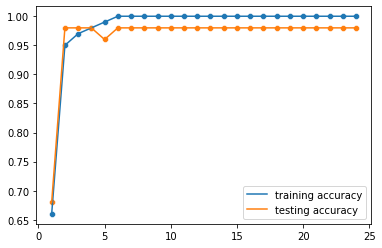

In [68]:
from sklearn.tree import DecisionTreeClassifier

depth = range(1,25)
testing_accuracy = []
training_accuracy = []
score = 0

for i in depth:
    tree = DecisionTreeClassifier(max_depth = i, criterion = 'entropy')
    tree.fit(x_train, y_train)
    
    y_predict_train = tree.predict(x_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = tree.predict(x_test)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_depth = i
sns.lineplot(depth, training_accuracy)
sns.scatterplot(depth, training_accuracy)
sns.lineplot(depth, testing_accuracy)
sns.scatterplot(depth, testing_accuracy)
plt.legend(['training accuracy', 'testing accuracy'])

In [69]:
print('This is the best depth for Decision Tree Classifier: ', best_depth, '\nAccuracy score is: ', score)
tree = DecisionTreeClassifier(max_depth = best_depth, criterion = 'entropy')
tree.fit(x_train, y_train)
    
y_predict_train = tree.predict(x_train)
training_accuracy.append(accuracy_score(y_train, y_predict_train))
    
y_predict_test = tree.predict(x_test)

cm_test = confusion_matrix(y_test,y_predict_test)
TN = cm_test[0,0]
TP = cm_test[1,1]
FN = cm_test[1,0]
FP = cm_test[0,1]

model_evaluate=model_evaluate.append(pd.DataFrame({
       'Accuracy':(TN+TP)/(TP+TN+FP+FN),
       'Precision':TP/(TP+FP),
       'Sensitivity':TP/(TP+FN),
       'Specificity':TN/(TN+FP)
        },
        
index=["DT"]))
model_evaluate

This is the best depth for Decision Tree Classifier:  2 
Accuracy score is:  0.98


,Accuracy,Precision,Sensitivity,Specificity
KNN,1.0,1.0,1.0,1.0
KNN+PCA+Tune,1.0,1.0,1.0,1.0
SVM,1.0,1.0,1.0,1.0
SVM+Tune,1.0,1.0,1.0,1.0
LR,1.0,1.0,1.0,1.0
LR+Tune,1.0,1.0,1.0,1.0
DT,1.0,1.0,1.0,1.0


# 3.4 Decision Tree & Fine-tune

In [70]:
from sklearn.model_selection import StratifiedKFold
tree = DecisionTreeClassifier(max_depth = 3, random_state = 3030)
hyperparam_space = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_leaf': [3, 9, 13, 15, 17],
    'class_weight': ['balanced'],
    'random_state': [3030]
}

grid = GridSearchCV(
                tree,
                param_grid = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'recall',
                n_jobs = -1)

grid.fit(x_train, y_train)
    
y_predict_test = grid.predict(x_test)
cm_test = confusion_matrix(y_test,y_predict_test)
TN = cm_test[0,0]
TP = cm_test[1,1]
FN = cm_test[1,0]
FP = cm_test[0,1]

model_evaluate=model_evaluate.append(pd.DataFrame({
       'Accuracy':(TN+TP)/(TP+TN+FP+FN),
       'Precision':TP/(TP+FP),
       'Sensitivity':TP/(TP+FN),
       'Specificity':TN/(TN+FP)
        },
        
index=["DT+Tune"]))
model_evaluate


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]



,Accuracy,Precision,Sensitivity,Specificity
KNN,1.0,1.0,1.0,1.0
KNN+PCA+Tune,1.0,1.0,1.0,1.0
SVM,1.0,1.0,1.0,1.0
SVM+Tune,1.0,1.0,1.0,1.0
LR,1.0,1.0,1.0,1.0
LR+Tune,1.0,1.0,1.0,1.0
DT,1.0,1.0,1.0,1.0
DT+Tune,1.0,1.0,1.0,1.0


# 3.5 Bagging Model

In [71]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=tree,
                       n_estimators=100,
                       random_state=0)
bag = bag.fit(x_train, y_train)

y_train_pred = bag.predict(x_train)
y_test_pred = bag.predict(x_test)

cm_test = confusion_matrix(y_test,y_test_pred)
TN = cm_test[0,0]
TP = cm_test[1,1]
FN = cm_test[1,0]
FP = cm_test[0,1]

model_evaluate=model_evaluate.append(pd.DataFrame({
       'Accuracy':(TN+TP)/(TP+TN+FP+FN),
       'Precision':TP/(TP+FP),
       'Sensitivity':TP/(TP+FN),
       'Specificity':TN/(TN+FP)
        },
        
index=["Bag"]))
model_evaluate

,Accuracy,Precision,Sensitivity,Specificity
KNN,1.0,1.0,1.0,1.0
KNN+PCA+Tune,1.0,1.0,1.0,1.0
SVM,1.0,1.0,1.0,1.0
SVM+Tune,1.0,1.0,1.0,1.0
LR,1.0,1.0,1.0,1.0
LR+Tune,1.0,1.0,1.0,1.0
DT,1.0,1.0,1.0,1.0
DT+Tune,1.0,1.0,1.0,1.0
Bag,1.0,1.0,1.0,1.0


# 3.7 LDA Model

In [72]:
import plotly.express as px
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create an instance of LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

lda.fit(x_train, y_train)
Lda_preds = lda.predict(x_test)

C_M = confusion_matrix(y_test,Lda_preds)
TN = C_M[0,0]
TP = C_M[1,1]
FN = C_M[1,0]
FP = C_M[0,1]
model_evaluate=model_evaluate.append(pd.DataFrame({
       'Accuracy':(TN+TP)/(TP+TN+FP+FN),
       'Precision':TP/(TP+FP),
       'Sensitivity':TP/(TP+FN),
       'Specificity':TN/(TN+FP)
        },
        
index=["LDA"]))
model_evaluate

,Accuracy,Precision,Sensitivity,Specificity
KNN,1.0,1.0,1.0,1.0
KNN+PCA+Tune,1.0,1.0,1.0,1.0
SVM,1.0,1.0,1.0,1.0
SVM+Tune,1.0,1.0,1.0,1.0
LR,1.0,1.0,1.0,1.0
LR+Tune,1.0,1.0,1.0,1.0
DT,1.0,1.0,1.0,1.0
DT+Tune,1.0,1.0,1.0,1.0
Bag,1.0,1.0,1.0,1.0
LDA,1.0,1.0,1.0,1.0
